# §3: Numeric Prediction 


### Purpose and Motivation
Mobile phones have become an indispensable part of our daily lives. As smartphones become more advanced, their prices increase accordingly. Therefore, predicting the price range of mobile phones based on their specifications is becoming increasingly important. In recent years, machine learning algorithms have shown promising results in solving such prediction problems. This chapter aims to demonstrate the use of machine learning to predict the price range of mobile phones using publicly available mobile phone data. We will compare and contrast three popular machine learning techniques: linear regression, regression tree, and random forest. Each of these techniques has its unique advantages and disadvantages. By comparing the performance of these three techniques, we can gain insight into the strengths and weaknesses of each approach for predicting the price range of mobile phones based on their specifications. This can help us to choose the best model for our specific prediction problem.

### Data

Source:	https://www.kaggle.com/iabhishekofficial/mobile-price-classification

In [2]:
#Import libraries
import warnings
warnings.simplefilter("ignore")  #Don't show warning messages

import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline 

data = pd.read_csv("mobile data - train.csv")

#Trim columns that will overcomplicate the analysis
data = data[['battery_power', 'blue', 'clock_speed', 'fc','int_memory','mobile_wt','touch_screen','n_cores','price_range']]


print(data.shape)
data.describe()

(2000, 9)


,battery_power,blue,clock_speed,fc,int_memory,mobile_wt,touch_screen,n_cores,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,4.309500,32.046500,140.249000,0.503000,4.520500,1.500000
std,439.418206,0.5001,0.816004,4.341444,18.145715,35.399655,0.500116,2.287837,1.118314
min,501.000000,0.0000,0.500000,0.000000,2.000000,80.000000,0.000000,1.000000,0.000000
25%,851.750000,0.0000,0.700000,1.000000,16.000000,109.000000,0.000000,3.000000,0.750000
50%,1226.000000,0.0000,1.500000,3.000000,32.000000,141.000000,1.000000,4.000000,1.500000
75%,1615.250000,1.0000,2.200000,7.000000,48.000000,170.000000,1.000000,7.000000,2.250000
max,1998.000000,1.0000,3.000000,19.000000,64.000000,200.000000,1.000000,8.000000,3.000000


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   fc             2000 non-null   int64  
 4   int_memory     2000 non-null   int64  
 5   mobile_wt      2000 non-null   int64  
 6   touch_screen   2000 non-null   int64  
 7   n_cores        2000 non-null   int64  
 8   price_range    2000 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 140.8 KB


### Procedure (Step 1): Pre-Processing

### Correlation Matrix

<AxesSubplot:>

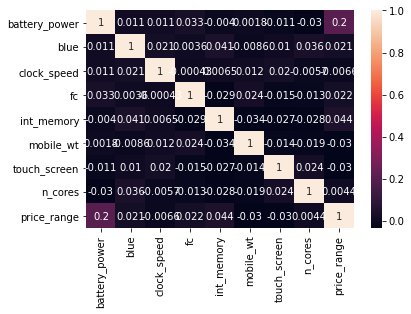

In [3]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot =True)

### Split data into Training and Testing
Splitting data into testing and training is a common technique used in machine learning to evaluate the performance of a model. The dataset is divided into two parts, where one part is used for training the model and the other part is used for testing the model's accuracy. The training dataset is used to train the model by optimizing its parameters, and the testing dataset is used to assess the model's ability to generalize to new, unseen data. This helps prevent overfitting and provides a better estimate of the model's true performance on new data.

In [4]:
from sklearn.model_selection import train_test_split

X = data.drop(['price_range'], axis = 1) #X is the independent variables, axis=1 for column
X.head()

y = data['price_range']                  #y is the dependent variable 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

print(X_train.shape, X_test.shape)

# random_state can be any integer. As long as it stays the same, you will get the same two data sets every time 
# you run it. 
# For numeric prediction, there is no class distribution, so stratified sampling is not needed.

(1600, 8) (400, 8)


### Procedure (Step 2): Linear Regression
Linear regression is a popular technique used to model the relationship between a dependent variable and one or more independent variables. It assumes that the relationship between the variables is linear and that the residuals (the difference between the predicted and actual values) are normally distributed. Linear regression is a simple and interpretable model, making it a good choice for predicting the price range of mobile phones based on their specifications.

In [5]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso        #Lasso is a type of Linear Regression model
from sklearn.model_selection import GridSearchCV

model = Lasso()
lasso_model = GridSearchCV(model, param_grid={'alpha': [0,1]})
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

print("Lasso RMSE:", mean_squared_error(y_test, y_pred_lasso,squared=False))   #squared=False returns RMSE value, if no such option, then MSE
print('Coefficients:',lasso_model.best_estimator_.coef_)
print('Intercept:',lasso_model.best_estimator_.intercept_)
print(X_train.columns)

Lasso RMSE: 1.1273740469651585
Coefficients: [ 0.00048423  0.         -0.         -0.          0.00064854 -0.
 -0.          0.        ]
Intercept: 0.8713568735440005
Index(['battery_power', 'blue', 'clock_speed', 'fc', 'int_memory', 'mobile_wt',
       'touch_screen', 'n_cores'],
      dtype='object')


### Procedure (Step 3): Regression Tree
A regression tree is a decision tree-based model used to predict continuous variables. It breaks down the data into smaller subsets and recursively applies decision rules to each subset until a stopping criterion is met. Regression trees can handle both linear and nonlinear relationships between the dependent and independent variables. They are also robust to outliers and missing values.

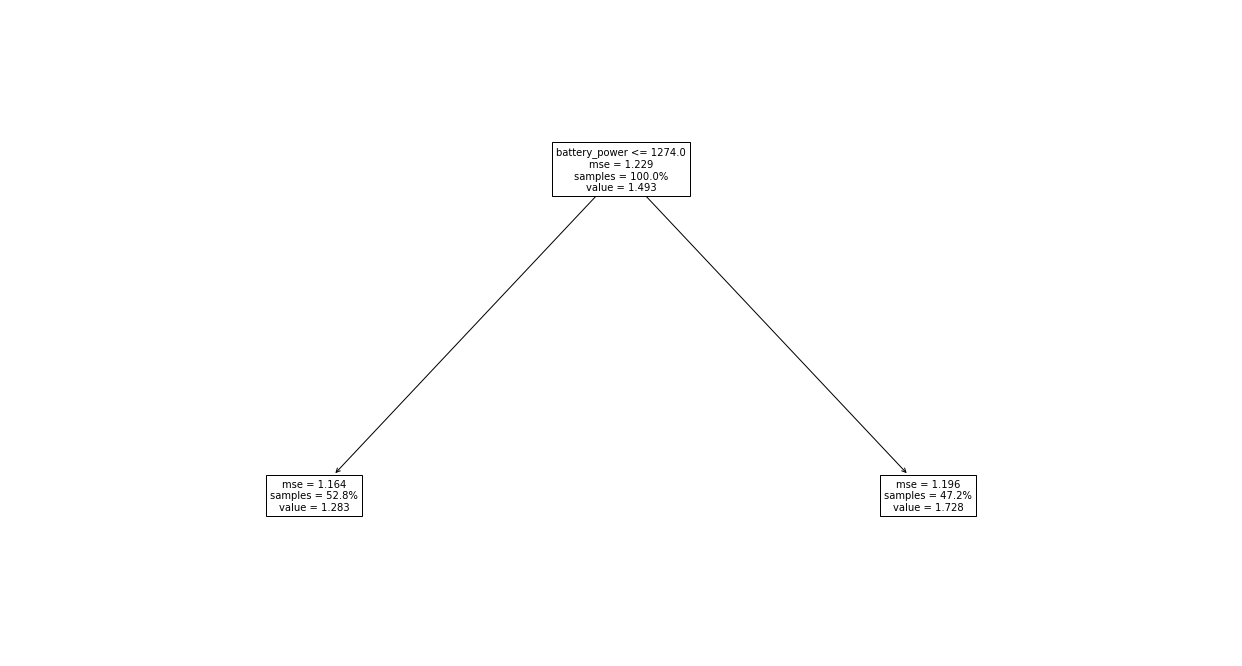

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt 

model = DecisionTreeRegressor()
dt = GridSearchCV(model, param_grid={"max_depth": [0,1,2,3,4,5,6,7,8,9]})
dt.fit(X_train, y_train)

plt.subplots(figsize=(22, 12)) 
plot_tree(dt.best_estimator_, max_depth=3, feature_names=X_train.columns, proportion=True, fontsize=10) 
plt.show()

In [7]:
y_pred_tree = dt.predict(X_test)

print("Tree RMSE:", mean_squared_error(y_test, y_pred_tree,squared=False))
print('Feature Importance:',dt.best_estimator_.feature_importances_)
print(X_train.columns)

Tree RMSE: 1.1262169367559944
Feature Importance: [1. 0. 0. 0. 0. 0. 0. 0.]
Index(['battery_power', 'blue', 'clock_speed', 'fc', 'int_memory', 'mobile_wt',
       'touch_screen', 'n_cores'],
      dtype='object')


### Procedure (Step 4): Random Forest
A random forest is an ensemble model that consists of multiple decision trees. It randomly selects a subset of features and data points to train each tree, making it more robust to overfitting than a single decision tree. Random forests can handle high-dimensional data and nonlinear relationships between the dependent and independent variables. They are also computationally efficient and can handle missing data. In our example, we will first calculate and display the RMSE and in our next cell write data to a spreadsheet.

In [8]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor() 
rf = GridSearchCV(model, param_grid={"max_depth": [0,1,2,3,4,5,6,7,8,9]})
rf.fit(X_train, y_train)
y_pred_forest = rf.predict(X_test)

print("Forest RMSE:", mean_squared_error(y_test, y_pred_forest,squared=False))

Forest RMSE: 1.1287606564131665


In [9]:
data_pred=X_test
data_pred['true_y']=y_test
data_pred['pred_y_lasso']=y_pred_lasso
data_pred['pred_y_tree']=y_pred_tree
data_pred['pred_y_forest']=y_pred_forest
data_pred.to_excel('Final_Predictions.xlsx', index=None)

## Results & Discussion

After reducing the data to common phone features, the linear regression analysis revealed that the price range is strongly correlated with the battery's energy capacity measured in mAh, as seen in the correlation matrix and confirmed by all three analysis types with small RMSE differences. RMSE (Root Mean Square Error) is a metric used to evaluate the accuracy of a numeric prediction model by measuring the difference between the predicted values and the actual values. The regression tree also showed that battery power is the sole determinant of price range.